This Notebook is for customer churn data from IDM. 

# Customer Churn Analysis for IDM

This notebook analyzes customer churn data from IDM using the Telco Customer Churn dataset. It includes data exploration, visualization, preprocessing, and the application of various machine learning models to predict customer churn. The goal is to gain insights into the factors influencing churn and to build predictive models for effective customer retention strategies.

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [6]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [9]:
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt

The dataset is loaded into a pandas DataFrame from the CSV file 'WA_Fn-UseC_-Telco-Customer-Churn.csv'. This dataset contains information about IDM's customers, including demographic details, account information, services subscribed, and whether the customer has churned. The DataFrame `df` has 7043 rows and 21 columns, with features such as gender, tenure, contract type, payment method, and churn status.

In [13]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.shape

(7043, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [19]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [22]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [23]:
(df['tenure'] == 0).sum()

np.int64(11)

In [24]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [25]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [32]:
columns = df.columns
print("******************* Numeric field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

print("\n******************* Categorical field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

******************* Numeric field *******************

unique number of tenure -> 72
unique number of MonthlyCharges -> 1584
unique number of TotalCharges -> 6530

******************* Categorical field *******************

unique number of gender -> 2
unique number of SeniorCitizen -> 2
unique number of Partner -> 2
unique number of Dependents -> 2
unique number of PhoneService -> 2
unique number of MultipleLines -> 3
unique number of InternetService -> 3
unique number of OnlineSecurity -> 3
unique number of OnlineBackup -> 3
unique number of DeviceProtection -> 3
unique number of TechSupport -> 3
unique number of StreamingTV -> 3
unique number of StreamingMovies -> 3
unique number of Contract -> 3
unique number of PaperlessBilling -> 2
unique number of PaymentMethod -> 4
unique number of Churn -> 2


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [27]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [28]:
sns.set(style = 'white')
import os

<Axes: >

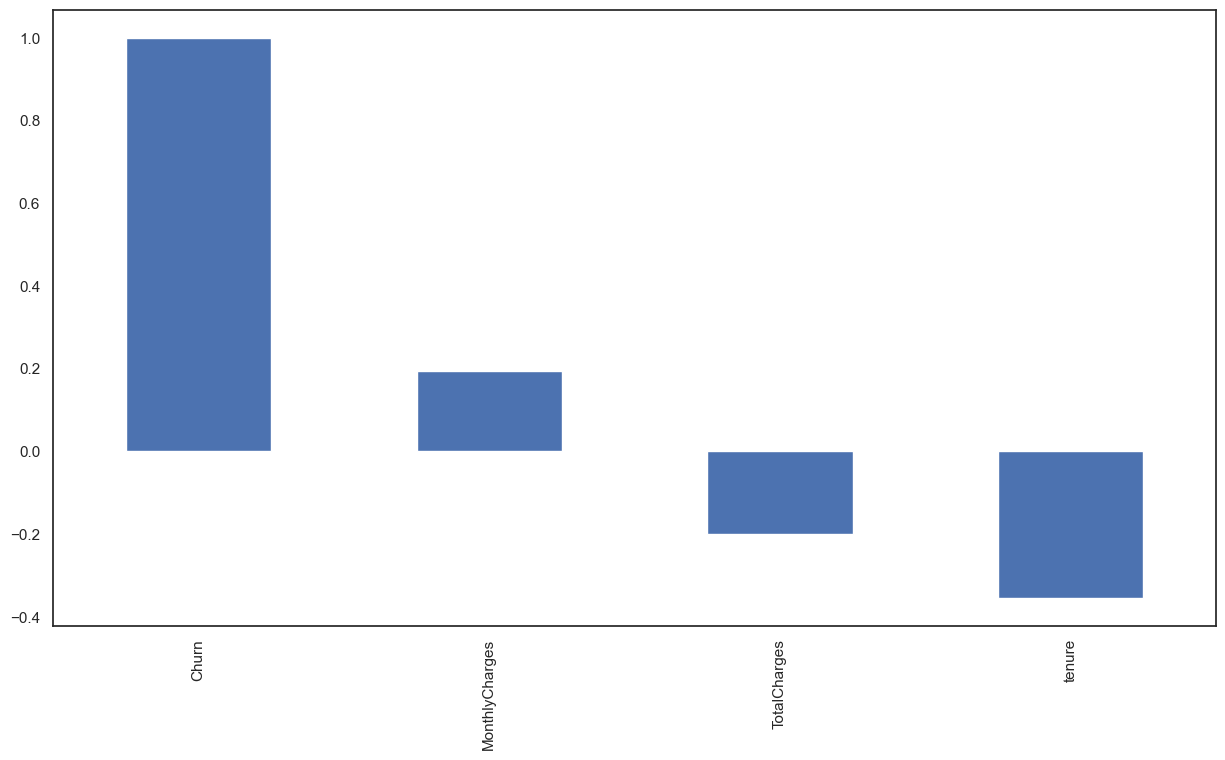

In [31]:
# Convert 'Churn' to numeric for correlation calculation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Select only numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include=[np.number])
plt.figure(figsize=(15,8))
numeric_cols.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [48]:
fig = px.histogram(df, x="Churn", color="Churn", title="Customer Churn Count", barmode='group')
fig.update_traces(marker_line_width=1, marker_line_color='black')
fig.update_layout(
  xaxis_title="Churn",
  yaxis_title="Count",
  showlegend=False,
  bargap=0.4,
  width=1000,
  height=500
)
fig.show()

print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [45]:
pip install altair

   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [55]:
# Filter for churned and non-churned customers using string values
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

# Percentage of male and female in churn=yes group
gender_churn_yes_counts = churn_yes['gender'].value_counts()
gender_churn_yes_percentages = gender_churn_yes_counts / len(churn_yes) * 100

print("Percentage of Male and Female in Churn=Yes group:")
print(gender_churn_yes_percentages)

print("\n" + "="*30 + "\n") # Separator

# Percentage of male and female in churn=no group
gender_churn_no_counts = churn_no['gender'].value_counts()
gender_churn_no_percentages = gender_churn_no_counts / len(churn_no) * 100

print("Percentage of Male and Female in Churn=No group:")
print(gender_churn_no_percentages)

Percentage of Male and Female in Churn=Yes group:
gender
Female    50.24077
Male      49.75923
Name: count, dtype: float64


Percentage of Male and Female in Churn=No group:
gender
Male      50.726322
Female    49.273678
Name: count, dtype: float64


In [61]:
# Calculate the total number of male and female customers
total_male = df[df['gender'] == 'Male'].shape[0]
total_female = df[df['gender'] == 'Female'].shape[0]

# Calculate the number of churned male and female customers
churned_male = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')].shape[0]
churned_female = df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')].shape[0]

# Calculate the churn percentage for male and female customers
churn_percentage_male = (churned_male / total_male) * 100
churn_percentage_female = (churned_female / total_female) * 100

print(f"{churn_percentage_male:.2f}% male customers actually churned")
print(f"{churn_percentage_female:.2f}% female customers actually churned")

26.20% male customers actually churned
26.96% female customers actually churned


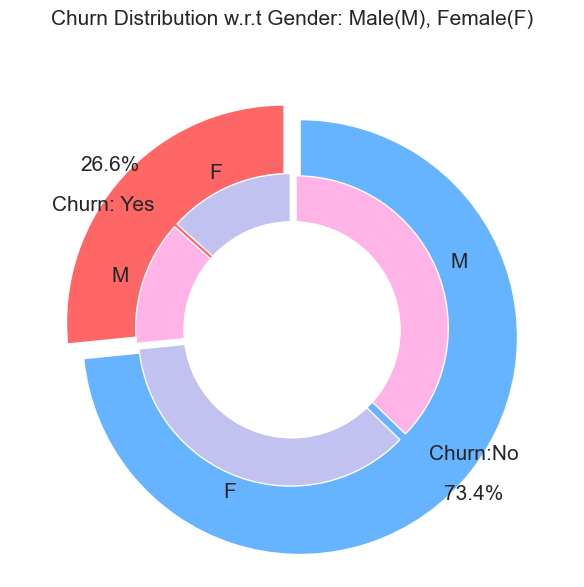

In [62]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.5,0.5)
explode_gender = (0.2,0.2,0.2,0.2)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [63]:
contract_churn_percentage = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


In [64]:
# Filter for month-to-month customers who churned
mtm_churned = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')]

# Calculate the average tenure (lifetime in months)
average_lifetime_mtm_churned = mtm_churned['tenure'].mean()
print(f"Average lifetime (in months) of month-to-month customers who churned: {average_lifetime_mtm_churned:.2f}")

Average lifetime (in months) of month-to-month customers who churned: 14.02


In [65]:
# Calculate average monthly charges for each contract type
avg_monthly_charges_by_contract = df.groupby('Contract')['MonthlyCharges'].mean()
print("Average Monthly Charges by Contract Type:")
print(avg_monthly_charges_by_contract)

Average Monthly Charges by Contract Type:
Contract
Month-to-month    66.398490
One year          65.079416
Two year          60.872374
Name: MonthlyCharges, dtype: float64


In [ ]:
avg_monthly_charges_mtm_churned = mtm_churned['MonthlyCharges'].mean()
print(f"Average Monthly Charges for month-to-month customers who churned: {avg_monthly_charAges_mtm_churned:.2f}")

Average Monthly Charges for month-to-month customers who churned: 73.02


In [ ]:
# Filter for month-to-month customers who churned and have MonthlyCharges > 65.08
mtm_churned_high_cost = df[(df['Contract'] == 'Month-to-month') & 
               (df['Churn'] == 'Yes') & 
               (df['MonthlyCharges'] > 65.08)] 

# Total month-to-month customers
total_mtm = df[df['Contract'] == 'Month-to-month'].shape[0]

# Percentage calculation
percentage = (mtm_churned_high_cost.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month contract customers who churned and whose monthly cost is more than 65.08: {percentage:.2f}%")

Percentage of month-to-month contract customers who churned and whose monthly cost is more than 65.08: 30.61%


In [68]:
# Filter for month-to-month customers who did not churn
mtm_not_churned = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'No')]

# Calculate the average monthly charges
avg_monthly_charges_mtm_not_churned = mtm_not_churned['MonthlyCharges'].mean()
print(f"Average Monthly Charges for month-to-month customers who did not churn: {avg_monthly_charges_mtm_not_churned:.2f}")

Average Monthly Charges for month-to-month customers who did not churn: 61.46


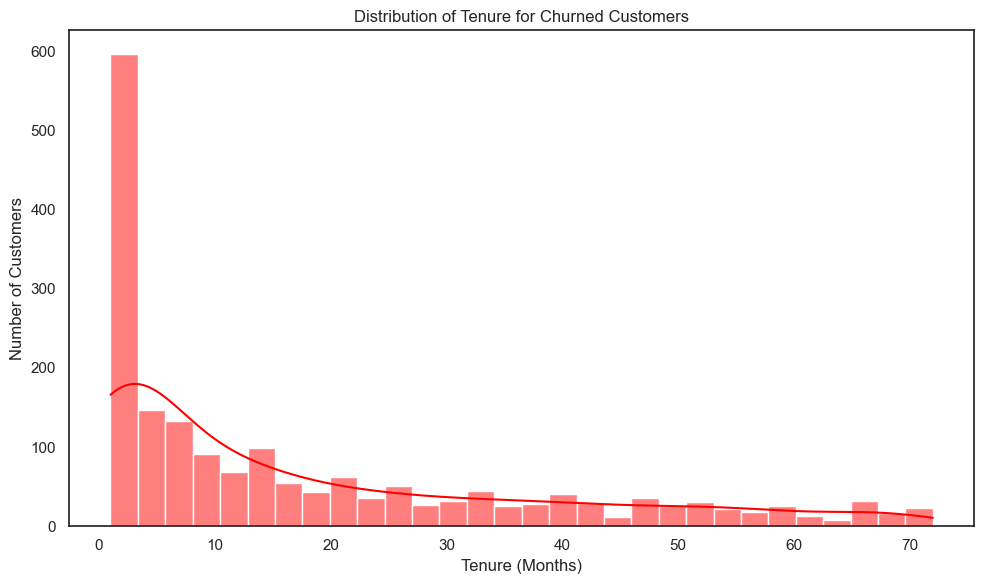

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_yes['tenure'], bins=30, kde=True, color='red')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [70]:
# Filter for month-to-month customers who churned with tenure <= 12 months
mtm_churned_early = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 12)]

# Calculate the percentage
percentage_early_churn = (mtm_churned_early.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned at or before 12 months tenure: {percentage_early_churn:.2f}%")

Percentage of month-to-month customers who churned at or before 12 months tenure: 26.43%


In [71]:
# Filter for month-to-month customers who churned with tenure <= 24 months
mtm_churned_24 = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 24)]

# Calculate the percentage
percentage_churn_24 = (mtm_churned_24.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned at or before 24 months tenure: {percentage_churn_24:.2f}%")

Percentage of month-to-month customers who churned at or before 24 months tenure: 33.60%


In [77]:
# Filter for month-to-month customers who churned and have MonthlyCharges < 60.87
mtm_churned_low_cost = df[(df['Contract'] == 'Month-to-month') & 
              (df['Churn'] == 'Yes') & 
              (df['MonthlyCharges'] < 60.87)]

# Percentage calculation
percentage_low_cost = (mtm_churned_low_cost.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned and whose monthly cost is less than 60.87: {percentage_low_cost:.2f}%")

Percentage of month-to-month customers who churned and whose monthly cost is less than 60.87: 11.77%


In [78]:
# Calculate the percentage of customers by contract type
contract_counts = df['Contract'].value_counts(normalize=True) * 100
print("Percentage of customers by contract type:")
print(contract_counts)

Percentage of customers by contract type:
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64
